# TMDB Movie data analysis

### 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### 

## TASK - 1

#### Load the movies dataset into python notebook. Display the number of rows and columns in dataset. Display the title and genres of the first 50 movies from dataset.

In [2]:
data = pd.read_csv("DS1_C8_V3_ND_Sprint2_Data Analysis Using Python_Dataset.csv")

Number of rows and columns in dataset.

In [3]:
data.shape

(4803, 20)

The dataset has 4803 rows and 20 columns.

### 

Title and genres of first 50 movies from dataset.

In [4]:
data.loc[:,["original_title","genres"]].head(50)

,original_title,genres
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
5,Spider-Man 3,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na..."
6,Tangled,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751..."
7,Avengers: Age of Ultron,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
8,Harry Potter and the Half-Blood Prince,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
9,Batman v Superman: Dawn of Justice,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


#### 

## TASK - 2

#### Identify the columns that have null values and perform the null value treatment. (Choose the imputation method based on the type of data in the columns of interest)

Number of null values in each column

In [5]:
A =  data.isnull().sum()

In [7]:
A[A>0]

homepage        3091
overview           3
release_date       1
runtime            2
tagline          844
dtype: int64

In [8]:
data.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

##### 

Missing value treatment of categorical columns

In [9]:
def missing_value_treatment(a):
    if data[a].isnull().sum() > 0 and data[a].dtypes == "O":
        mode_value = data[a].mode()[0]
        data[a].fillna(mode_value, inplace=True)
    else:
        mean_value = data[a].mean()
        data[a].fillna(mean_value, inplace=True)

In [10]:
missing_value_treatment("homepage")

In [11]:
missing_value_treatment("overview")

In [12]:
missing_value_treatment("runtime")

In [13]:
missing_value_treatment("tagline")

In [35]:
data["release_date"].fillna(data["release_date"].mode()[0], inplace = True)

In [36]:
data.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

### 

## TASK - 3

#### Display the movies category that have budget greater than 220000.

In [15]:
a = data[data["budget"]>220000]
a[["genres","budget"]]

,genres,budget
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000
...,...,...
4680,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",450000
4682,"[{""id"": 27, ""name"": ""Horror""}]",13000000
4720,"[{""id"": 18, ""name"": ""Drama""}]",8500000
4758,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",4000000


##### 

## TASK - 4

#### Display the movie categories where the revenue is greater than 961000000.

In [38]:
b = data[data["revenue"] > 961000000]
b[["genres","revenue"]]

,genres,revenue
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2787965087
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",1084939099
7,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1405403694
12,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",1065659812
16,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",1519557910
17,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",1045713802
25,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",1845034188
26,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",1153304495
28,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1513528810
29,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1108561013


##### 

## TASK - 5

#### In the dataset there are some movies which the budget and revenue column have the value 0, which mean unknown values remove the rows with value 0 from the both budget and revenue column.

In [17]:
data = data[(data["budget"]!=0) & (data["revenue"]!=0)]
data

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",13-09-1994,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",http://www.missionimpossible.com/,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12-03-1972,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",http://

### 

## TASK - 6

#### List the top 10 movies with highest revenue and top 10 and the movies with least 10 budget.

Top 10 movies with highest revenue.

In [18]:
data.sort_values("revenue", ascending = False).head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",18-11-1997,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",25-04-2012,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-06-2015,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",01-04-2015,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",22-04-2015,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767
124,150000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""...",http://movies.disney.com/frozen,109445,"[{""id"": 2011, ""name"": ""queen""}, {""id"": 4344, ""...",en,Frozen,Young princess Anna of Arendelle dreams about ...,165.125366,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",27-11-2013,1274219009,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Only the act of true love will thaw a frozen h...,Frozen,7.3,5295
31,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/ironman3,68721,"[{""id"": 949, ""name"": ""terrorist""}, {""id"": 5597...",en,Iron Man 3,When Tony Stark's world is torn apart by a for...,77.682080,"[

##### 

Top 10 movies with least budget.

In [19]:
data.sort_values("budget").head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4238,1,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",http://www.missionimpossible.com/,3082,"[{""id"": 1382, ""name"": ""factory""}, {""id"": 1546,...",en,Modern Times,The Tramp struggles to live in modern industri...,28.276480,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",05-02-1936,8500000,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He stands alone as the greatest entertainer of...,Modern Times,8.1,856
3611,4,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.missionimpossible.com/,22649,"[{""id"": 131, ""name"": ""italy""}, {""id"": 428, ""na...",en,A Farewell to Arms,British nurse Catherine Barkley (Helen Hayes) ...,1.199451,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",08-12-1932,25,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Every woman who has loved will understand,A Farewell to Arms,6.2,28
3372,7,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",http://www.missionimpossible.com/,13006,"[{""id"": 3528, ""name"": ""flooding""}, {""id"": 9685...",en,Split Second,"In a futuristic London, the rising sea levels ...",4.857028,"[{""name"": ""Entertainment"", ""id"": 7676}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",01-05-1992,5,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's seen the future. Now he has to kill it.,Split Second,5.7,63
3419,7,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.missionimpossible.com/,38415,"[{""id"": 4344, ""name"": ""musical""}, {""id"": 18705...",en,Bran Nue Dae,In the Summer of 1965 a young man is filled wi...,0.050456,[],[],09-08-2009,7,82.0,[],Released,Bran Nue Dae,Bran Nue Dae,5.2,6
4608,8,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 27, ""na...",http://www.missionimpossible.com/,11980,"[{""id"": 290, ""name"": ""angel""}, {""id"": 3648, ""n...",en,The Prophecy,The angel Gabriel comes to Earth to collect a ...,11.818333,"[{""name"": ""Dimension Films"", ""id"": 7405}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",01-09-1995,16,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"On ancient ground, at the edge of the world, a...",The Prophecy,6.4,138
3131,10,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://hrosss.is/the-film/,217708,"[{""id"": 2673, ""name"": ""horse""}, {""id"": 3373, ""...",is,Hross í oss,A country romance about the human streak in th...,1.617943,"[{""name"": ""Filmhuset Gruppen"", ""id"": 68384}, {...","[{""iso_3166_1"": ""NO"", ""name"": ""Norway""}, {""iso...",30-08-2013,11,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Based on a true story.,Of Horses and Men,6.9,26
3137,10,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",http://www.missionimpossible.com/,78383,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 7098, ""n...",en,Nurse 3-D,"Abby Russell, a beautiful, dedicated nurse wit...",10.013629,"[{""name"": ""Lions Gate"", ""id"": 6644}, {""name"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",28-09-2013,10000000,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Your pain is her pleasure.,Nurse 3-D,4.9,119
2933,11,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://www.missionimpossible.com/,28932,[],en,F.I.S.T.,Johnny Kovak joins the Teamsters trade-union i...,3.375208,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",26-04-1978,11,145.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,F.I.S.T.,6.4,29
1912,25,"[{""id"": 18, 

###### 

## TASK - 7

#### How are popularities of movies related with the movies budgets ? are they correlated or total uncorrelated with each other ? Write the interpretation of your analysis.

<Axes: title={'center': 'Popularity of Movies'}, xlabel='Revenue', ylabel='Budget'>

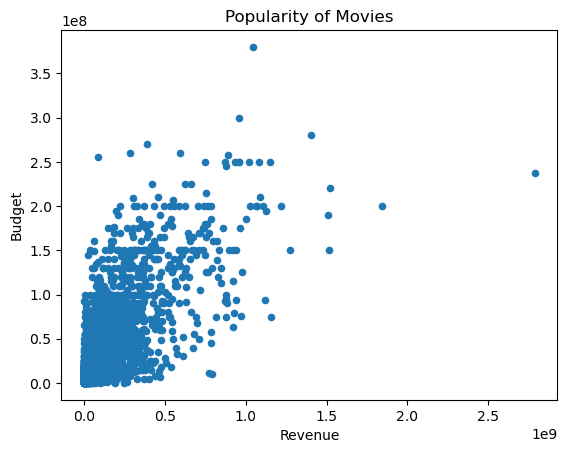

In [20]:
data.plot(x = 'revenue',
          y = 'budget',
          kind = 'scatter',
          title = 'Popularity of Movies',xlabel='Revenue',ylabel='Budget')

#### Interpretation :
As the budget increases, revenue also increases, indicating a positive correlation between budget and revenue.

##### 

## TASK - 8

#### Identify and display the name of all production campanies along with the number of time they appears in the dataset.

In [21]:
x = data["production_companies"].value_counts()
pd.DataFrame(x)

,count
production_companies,
"[{""name"": ""Paramount Pictures"", ""id"": 4}]",48
[],41
"[{""name"": ""Universal Pictures"", ""id"": 33}]",35
"[{""name"": ""New Line Cinema"", ""id"": 12}]",29
"[{""name"": ""Columbia Pictures"", ""id"": 5}]",28
...,...
"[{""name"": ""Universal Pictures"", ""id"": 33}, {""name"": ""Bristol Bay Productions"", ""id"": 2233}, {""name"": ""Baldwin Entertainment Group"", ""id"": 2234}, {""name"": ""Anvil Films"", ""id"": 8833}]",1
"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""name"": ""Original Film"", ""id"": 333}, {""name"": ""Kanzaman"", ""id"": 4169}, {""name"": ""Relativity Media"", ""id"": 7295}, {""name"": ""Art In Motion"", ""id"": 31604}]",1
"[{""name"": ""The Montecito Picture Company"", ""id"": 2364}, {""name"": ""De Line Pictures"", ""id"": 2609}, {""name"": ""Bernard Gayle Productions"", ""id"": 3194}]",1


##### 

## TASK - 9

#### Display the names of top 25 production campanies based on the number of movies they produced in descending order of the number of movies produced.

In [22]:
z = data.groupby("production_companies")["original_title"].count()
pd.DataFrame(z.sort_values(ascending=False).head(25))

,original_title
production_companies,
"[{""name"": ""Paramount Pictures"", ""id"": 4}]",48
[],41
"[{""name"": ""Universal Pictures"", ""id"": 33}]",35
"[{""name"": ""New Line Cinema"", ""id"": 12}]",29
"[{""name"": ""Columbia Pictures"", ""id"": 5}]",28
"[{""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}]",25
"[{""name"": ""Metro-Goldwyn-Mayer (MGM)"", ""id"": 8411}]",24
"[{""name"": ""Warner Bros."", ""id"": 6194}]",24
"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",18


#### 

## TASK - 10

#### Sort the data in desecnding value based on revenue and filtered top 500 campanies, Find the measures of central tendency for the following columns using the filtered data.

##### Outliers analysis using box plot.

In [23]:
task_10 = data.sort_values("revenue", ascending = False).head(500)

In [24]:
def central_tendencies(a):
    mean = task_10[a].mean()
    median = task_10[a].median()
    mode = task_10[a].mode()
    
    print(f"Central tencies of {a}")
    print()
    print(f"Mean : {mean}")
    print(f"Median : {median}")
    print(f"Mode : {mode[0]}")  

#### Budget

Central tencies of budget

Mean : 103193736.0
Median : 95000000.0
Mode : 150000000
None


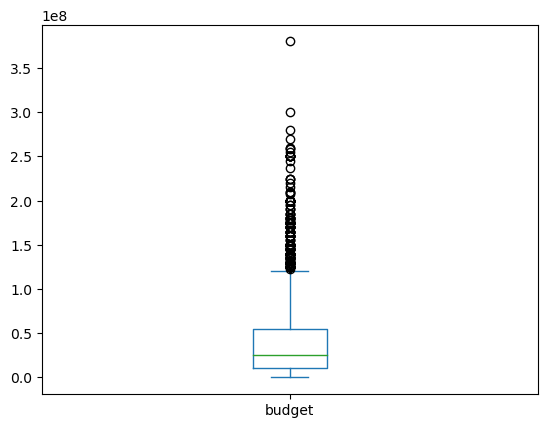

In [39]:
print(central_tendencies("budget"))
data["budget"].plot(kind="box",stacked=False)
plt.show()

#### Revenue

Central tencies of revenue

Mean : 458577595.062
Median : 363001569.5
Mode : 217764291
None


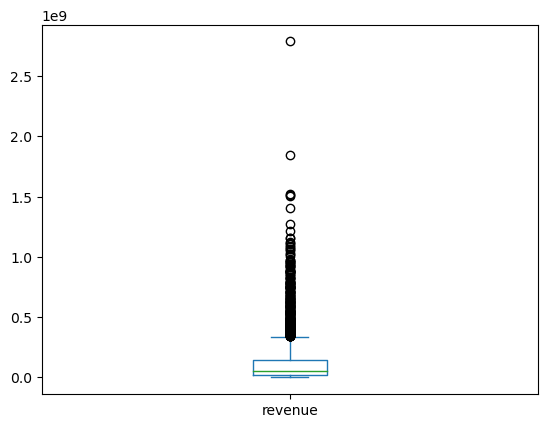

In [40]:
print(central_tendencies("revenue"))
data["revenue"].plot(kind="box",stacked=False)
plt.show()

#### Runtime

Central tencies of runtime

Mean : 118.72
Median : 116.0
Mode : 115.0
None


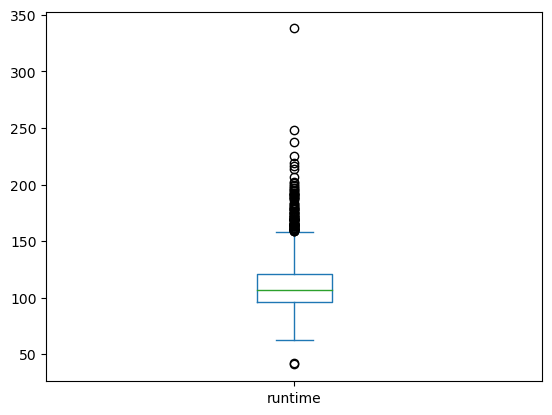

In [41]:
print(central_tendencies("runtime"))
data["runtime"].plot(kind="box",stacked=False)
plt.show()

#### 

## TASK - 11

#### Identify and Display the names of movies along with their runtimes for those movies that have above average runtime using the data from previous task.

In [31]:
task_11 = pd.concat([task_10["original_title"], task_10["runtime"]], axis=1)
task_11[task_11["runtime"]>(task_11["runtime"].mean())]

,original_title,runtime
0,Avatar,162.0
25,Titanic,194.0
16,The Avengers,143.0
28,Jurassic World,124.0
44,Furious 7,137.0
...,...,...
521,The Terminal,128.0
397,It's Complicated,121.0
1744,Knocked Up,129.0
717,Jack Reacher,130.0
